## Problem Statement 
How accuractely the model which is trained on current year dataset is able to predict the happiness score for the next year.

In [9]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import matplotlib.pylab as plt

import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
import statsmodels.formula.api as sm

from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

from sklearn.metrics import accuracy_score

## 2015 Dataset analysis

In [3]:
happy_data_2015 = pd.read_csv(r"C:\Users\mansi\Advance Big data\Assignment 3\Happiness\2015.csv")
happy_data_2015.head()

,Country,Region,Happiness_Rank,Happiness_Score,Standard_Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia_Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4]:
happy_data_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            158 non-null    object 
 1   Region             158 non-null    object 
 2   Happiness_Rank     158 non-null    int64  
 3   Happiness_Score    158 non-null    float64
 4   Standard_Error     158 non-null    float64
 5   Economy            158 non-null    float64
 6   Family             158 non-null    float64
 7   Health             158 non-null    float64
 8   Freedom            158 non-null    float64
 9   Trust              158 non-null    float64
 10  Generosity         158 non-null    float64
 11  Dystopia_Residual  158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 14.9+ KB


In [5]:
happy_data_2015.describe()

,Happiness_Rank,Happiness_Score,Standard_Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia_Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [7]:
happy_data_2015.shape

(158, 12)

### HeatMap analysis
From the correlation graph we can conclude that happiness score is majorly related on economy, family and health. 

<AxesSubplot:>

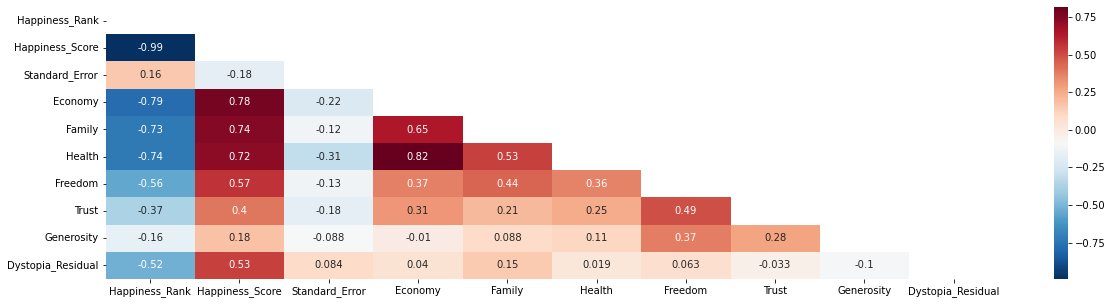

In [12]:
mask = np.zeros_like(happy_data_2015.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(20,5))
sns.heatmap(happy_data_2015.corr(),cmap='RdBu_r',mask=mask, annot=True)

### visualization for 2015 dataset

array([[<AxesSubplot:title={'center':'Happiness_Score'}>]], dtype=object)

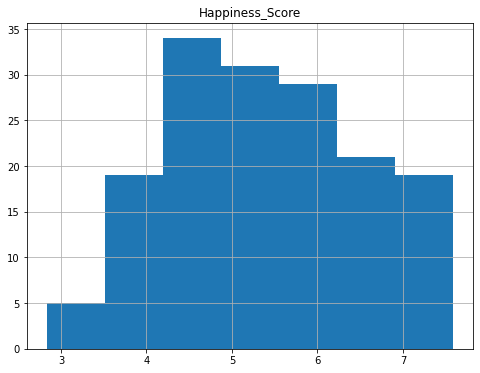

In [13]:
happy_data_2015.hist(column=['Happiness_Score'],bins=7, figsize=(8,6))

In [14]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.express as px

fig = px.choropleth(happy_data_2015, locations='Country',
                    locationmode = "country names",
                    color="Happiness_Score",
                    hover_name = 'Country',
                    hover_data={'Country':False,
                                'Happiness_Score': True
                               }
                   )
fig.update_layout(width=1000, height=600, margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

<AxesSubplot:xlabel='Happiness_Score', ylabel='Country'>

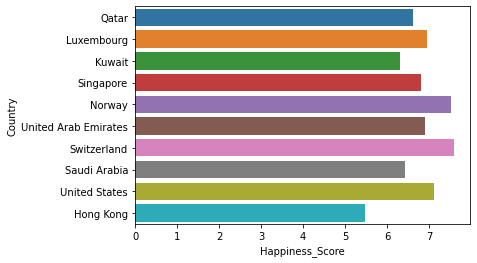

In [32]:
sns.barplot(x = 'Happiness_Score',y = 'Country',data=happy_data_2015.nlargest(10,'Economy'))

<AxesSubplot:xlabel='Dystopia_Residual', ylabel='Country'>

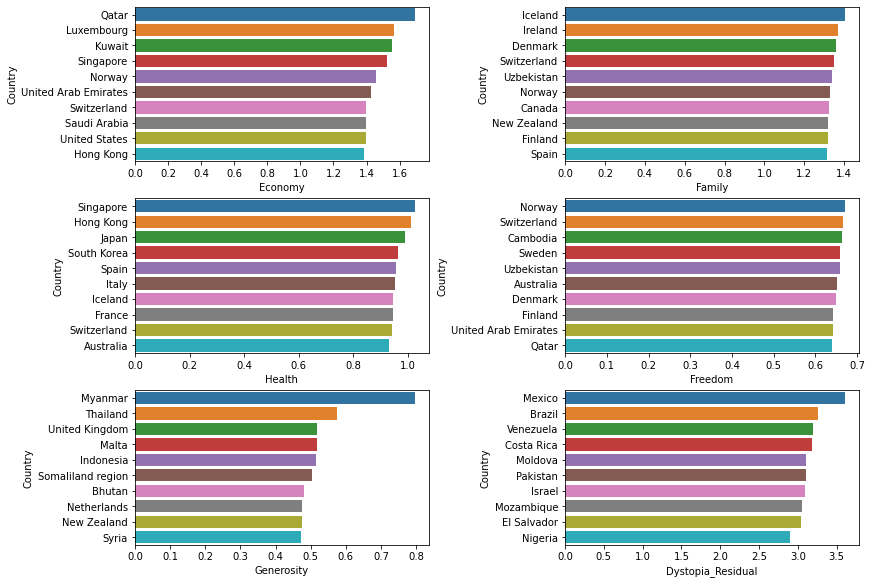

In [18]:
fig, axes = plt.subplots(nrows=3, ncols=2,constrained_layout=True,figsize=(12,8))

sns.barplot(x='Economy',y='Country',data=happy_data_2015.nlargest(10,'Economy'),
            ax=axes[0,0])
sns.barplot(x='Family' ,y='Country',data=happy_data_2015.nlargest(10,'Family'),
            ax=axes[0,1])
sns.barplot(x='Health' ,y='Country',data=happy_data_2015.nlargest(10,'Health'),
            ax=axes[1,0])
sns.barplot(x='Freedom' ,y='Country',data=happy_data_2015.nlargest(10,'Freedom'),
            ax=axes[1,1])
sns.barplot(x='Generosity' ,y='Country',data=happy_data_2015.nlargest(10,'Generosity'),
            ax=axes[2,0])
sns.barplot(x='Dystopia_Residual' ,y='Country',data=happy_data_2015.nlargest(10,'Dystopia_Residual'),
            ax=axes[2,1])

In [33]:
happy_data_2015.groupby(['Region'])['Happiness_Score'].mean().sort_values(ascending=False)

Region
Australia and New Zealand          7.285000
North America                      7.273000
Western Europe                     6.689619
Latin America and Caribbean        6.144682
Eastern Asia                       5.626167
Middle East and Northern Africa    5.406900
Central and Eastern Europe         5.332931
Southeastern Asia                  5.317444
Southern Asia                      4.580857
Sub-Saharan Africa                 4.202800
Name: Happiness_Score, dtype: float64

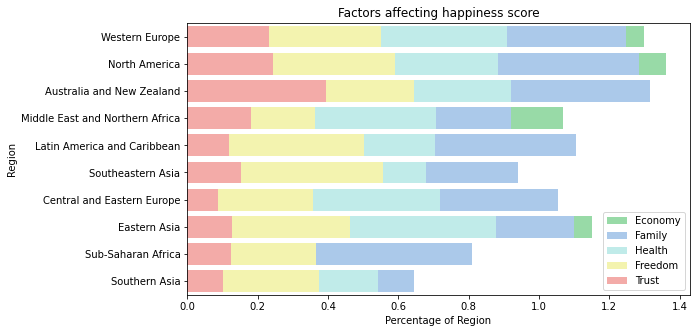

In [38]:
region_lists=list(happy_data_2015['Region'].unique())
share_economy=[]
share_family=[]
share_health=[]
share_freedom=[]
share_trust=[]
for each in region_lists:
    region=happy_data_2015[happy_data_2015['Region']==each]
    share_economy.append(sum(region.Economy)/len(region))
    share_family.append(sum(region.Family)/len(region))
    share_health.append(sum(region.Health)/len(region))
    share_freedom.append(sum(region.Freedom)/len(region))
    share_trust.append(sum(region.Trust)/len(region))
#Visualization
f,ax = plt.subplots(figsize = (9,5))
sns.barplot(x=share_economy,y=region_lists,color='g',label="Economy")
sns.barplot(x=share_family,y=region_lists,color='b',label="Family")
sns.barplot(x=share_health,y=region_lists,color='c',label="Health")
sns.barplot(x=share_freedom,y=region_lists,color='y',label="Freedom")
sns.barplot(x=share_trust,y=region_lists,color='r',label="Trust")
ax.legend(loc="lower right",frameon = True)
ax.set(xlabel='Percentage of Region', ylabel='Region',title = "Factors affecting happiness score")
plt.show()

## 2016 Dataset analysis

In [107]:
happy_data_2016 = pd.read_csv(r"C:\Users\mansi\Advance Big data\Assignment 3\Happiness\2016.csv")
happy_data_2016.head()

,Country,Region,Happiness_Rank,Happiness_Score,Lower Confidence Interval,Upper Confidence Interval,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia_Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [43]:
happy_data_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country                    158 non-null    object 
 1   Region                     158 non-null    object 
 2   Happiness_Rank             158 non-null    int64  
 3   Happiness_Score            158 non-null    float64
 4   Lower Confidence Interval  158 non-null    float64
 5   Upper Confidence Interval  158 non-null    float64
 6   Economy                    158 non-null    float64
 7   Family                     158 non-null    float64
 8   Health                     158 non-null    float64
 9   Freedom                    158 non-null    float64
 10  Trust                      158 non-null    float64
 11  Generosity                 158 non-null    float64
 12  Dystopia_Residual          158 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 

In [45]:
happy_data_2016.describe()

,Happiness_Rank,Happiness_Score,Lower Confidence Interval,Upper Confidence Interval,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia_Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.481013,5.366089,5.282395,5.481975,0.949163,0.789484,0.555890,0.370953,0.137432,0.242155,2.321006
std,45.754916,1.155877,1.144381,1.132868,0.415530,0.270893,0.229648,0.145044,0.110710,0.133465,0.543849
min,1.000000,2.839000,2.732000,3.078000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.817890
25%,40.250000,4.397250,4.333000,4.475750,0.640863,0.638660,0.374045,0.258680,0.061288,0.154993,2.006555
50%,79.500000,5.308500,5.259697,5.450487,1.025980,0.839605,0.596295,0.394920,0.105800,0.222235,2.286050
75%,118.750000,6.261500,6.147500,6.422000,1.278748,1.019672,0.727905,0.483805,0.175297,0.311308,2.662523
max,158.000000,7.526000,7.460000,7.669000,1.824270,1.183260,0.952770,0.608480,0.505210,0.819710,3.837720


In [47]:
happy_data_2016.shape

(158, 13)

### HeatMap Analysis 


<AxesSubplot:>

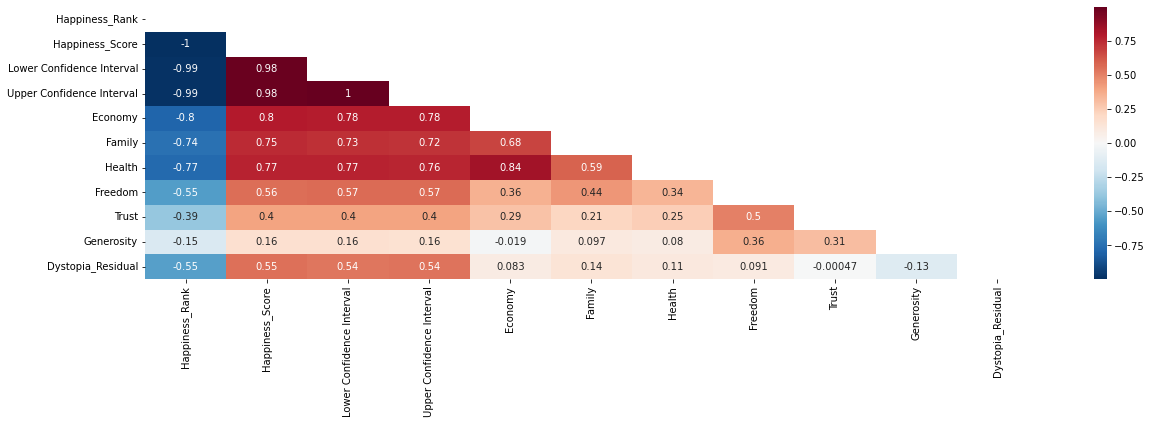

In [75]:
mask = np.zeros_like(happy_data_2016.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(20,5))
sns.heatmap(happy_data_2016.corr(),cmap='RdBu_r',mask=mask, annot=True)

### visualization for 2016 dataset

array([[<AxesSubplot:title={'center':'Happiness_Score'}>]], dtype=object)

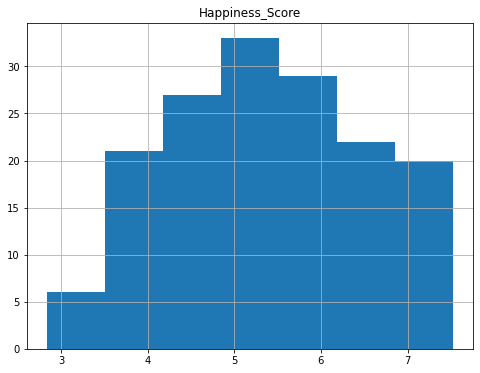

In [76]:
happy_data_2016.hist(column=['Happiness_Score'],bins=7, figsize=(8,6))

In [80]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.express as px

fig = px.choropleth(happy_data_2016, locations='Country',
                    locationmode = "country names",
                    color="Happiness_Score",
                    hover_name = 'Country',
                    hover_data={'Country':False,
                                'Happiness_Score': True
                               }
                   )
fig.update_layout(width=1000, height=600, margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

<AxesSubplot:xlabel='Happiness_Score', ylabel='Country'>

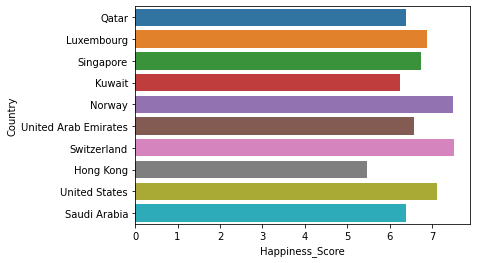

In [78]:
sns.barplot(x = 'Happiness_Score',y = 'Country',data=happy_data_2016.nlargest(10,'Economy'))

<AxesSubplot:xlabel='Dystopia_Residual', ylabel='Country'>

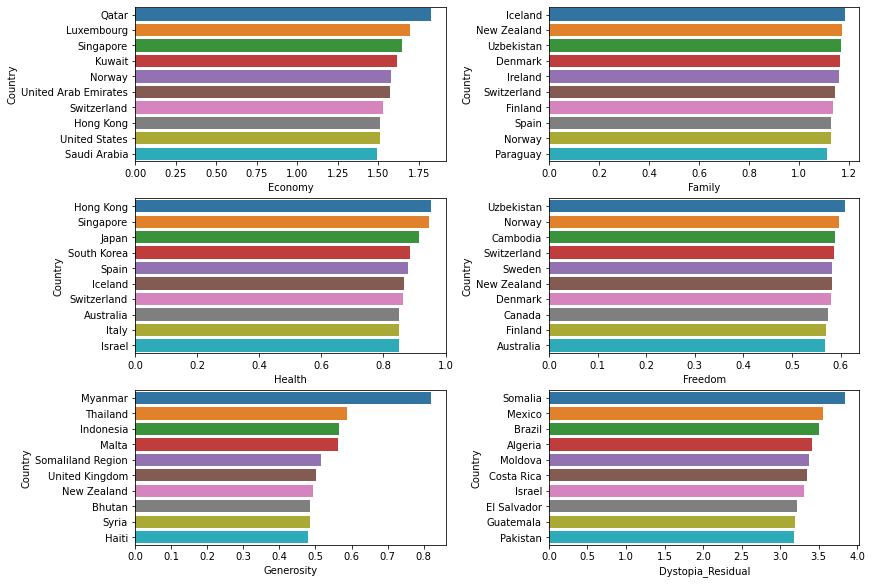

In [79]:
fig, axes = plt.subplots(nrows=3, ncols=2,constrained_layout=True,figsize=(12,8))

sns.barplot(x='Economy',y='Country',data=happy_data_2016.nlargest(10,'Economy'),
            ax=axes[0,0])
sns.barplot(x='Family' ,y='Country',data=happy_data_2016.nlargest(10,'Family'),
            ax=axes[0,1])
sns.barplot(x='Health' ,y='Country',data=happy_data_2016.nlargest(10,'Health'),
            ax=axes[1,0])
sns.barplot(x='Freedom' ,y='Country',data=happy_data_2016.nlargest(10,'Freedom'),
            ax=axes[1,1])
sns.barplot(x='Generosity' ,y='Country',data=happy_data_2016.nlargest(10,'Generosity'),
            ax=axes[2,0])
sns.barplot(x='Dystopia_Residual' ,y='Country',data=happy_data_2016.nlargest(10,'Dystopia_Residual'),
            ax=axes[2,1])

In [105]:
happy_data_2016.groupby(['Region'])['Happiness_Score'].mean().sort_values(ascending=False)

Region
Australia and New Zealand          7.323500
North America                      7.254000
Western Europe                     6.685667
Latin America and Caribbean        6.101750
Eastern Asia                       5.624167
Middle East and Northern Africa    5.386053
Central and Eastern Europe         5.370690
Southeastern Asia                  5.338889
Southern Asia                      4.563286
Sub-Saharan Africa                 4.103154
Name: Happiness_Score, dtype: float64

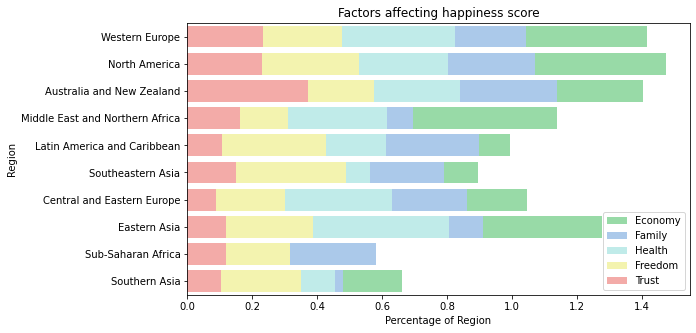

In [109]:
region_lists=list(happy_data_2016['Region'].unique())
share_economy=[]
share_family=[]
share_health=[]
share_freedom=[]
share_trust=[]
for each in region_lists:
    region=happy_data_2016[happy_data_2016['Region']==each]
    share_economy.append(sum(region.Economy)/len(region))
    share_family.append(sum(region.Family)/len(region))
    share_health.append(sum(region.Health)/len(region))
    share_freedom.append(sum(region.Freedom)/len(region))
    share_trust.append(sum(region.Trust)/len(region))
#Visualization
f,ax = plt.subplots(figsize = (9,5))
sns.barplot(x=share_economy,y=region_lists,color='g',label="Economy")
sns.barplot(x=share_family,y=region_lists,color='b',label="Family")
sns.barplot(x=share_health,y=region_lists,color='c',label="Health")
sns.barplot(x=share_freedom,y=region_lists,color='y',label="Freedom")
sns.barplot(x=share_trust,y=region_lists,color='r',label="Trust")
ax.legend(loc="lower right",frameon = True)
ax.set(xlabel='Percentage of Region', ylabel='Region',title = "Factors affecting happiness score")
plt.show()

## 2017 Dataset analysis

In [81]:
happy_data_2017 = pd.read_csv(r"C:\Users\mansi\Advance Big data\Assignment 3\Happiness\2017.csv")
happy_data_2017.head()

,Country,Happiness_Rank,Happiness_Score,Whisker.high,Whisker.low,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia_Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [82]:
happy_data_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            155 non-null    object 
 1   Happiness_Rank     155 non-null    int64  
 2   Happiness_Score    155 non-null    float64
 3   Whisker.high       155 non-null    float64
 4   Whisker.low        155 non-null    float64
 5   Economy            155 non-null    float64
 6   Family             155 non-null    float64
 7   Health             155 non-null    float64
 8   Freedom            155 non-null    float64
 9   Generosity         155 non-null    float64
 10  Corruption         155 non-null    float64
 11  Dystopia_Residual  155 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 14.7+ KB


In [83]:
happy_data_2017.describe()

,Happiness_Rank,Happiness_Score,Whisker.high,Whisker.low,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia_Residual
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,78.000000,5.354019,5.452326,5.255713,0.984718,1.188898,0.551341,0.408786,0.246883,0.123120,1.850238
std,44.888751,1.131230,1.118542,1.145030,0.420793,0.287263,0.237073,0.149997,0.134780,0.101661,0.500028
min,1.000000,2.693000,2.864884,2.521116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914
25%,39.500000,4.505500,4.608172,4.374955,0.663371,1.042635,0.369866,0.303677,0.154106,0.057271,1.591291
50%,78.000000,5.279000,5.370032,5.193152,1.064578,1.253918,0.606042,0.437454,0.231538,0.089848,1.832910
75%,116.500000,6.101500,6.194600,6.006527,1.318027,1.414316,0.723008,0.516561,0.323762,0.153296,2.144654
max,155.000000,7.537000,7.622030,7.479556,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485


In [84]:
happy_data_2017.shape

(155, 12)

<AxesSubplot:>

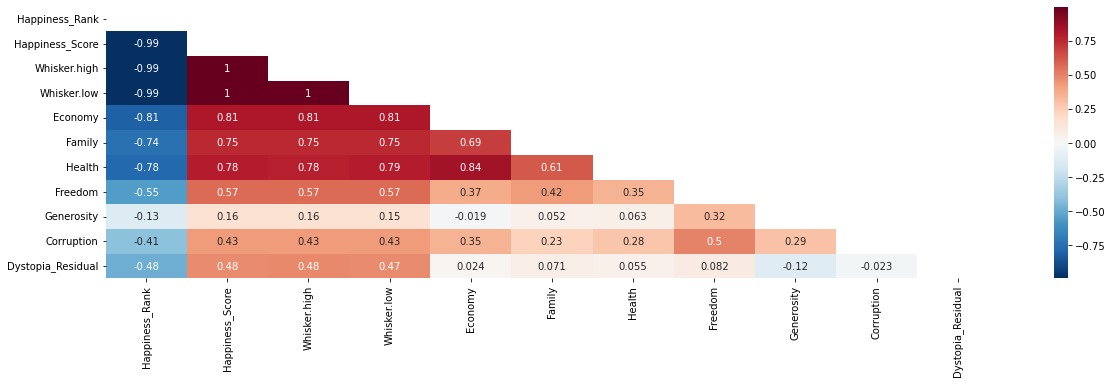

In [85]:
mask = np.zeros_like(happy_data_2017.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(20,5))
sns.heatmap(happy_data_2017.corr(),cmap='RdBu_r',mask=mask, annot=True)

<AxesSubplot:xlabel='Happiness_Score', ylabel='Country'>

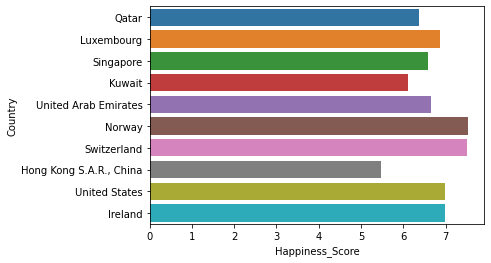

In [96]:
sns.barplot(x = 'Happiness_Score',y = 'Country',data=happy_data_2017.nlargest(10,'Economy'))

<AxesSubplot:xlabel='Dystopia_Residual', ylabel='Country'>

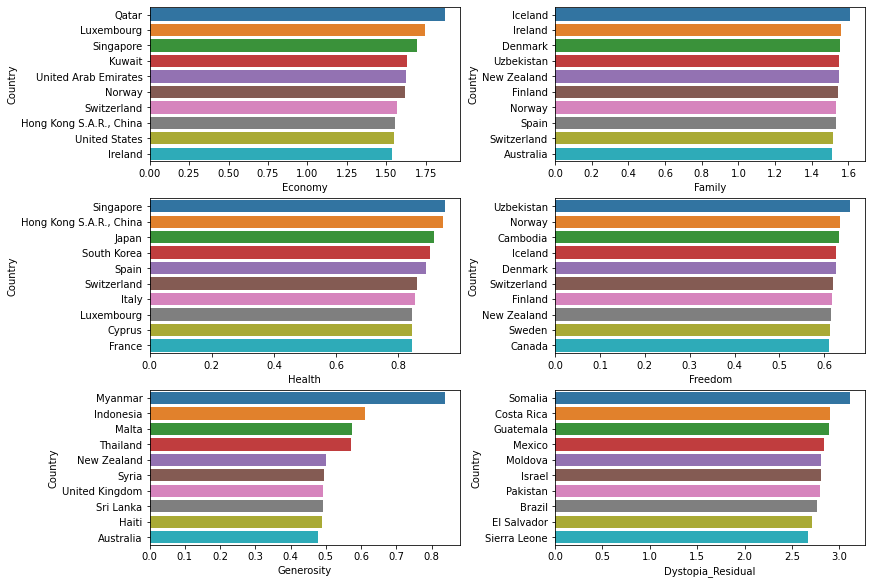

In [100]:
fig, axes = plt.subplots(nrows=3, ncols=2,constrained_layout=True,figsize=(12,8))

sns.barplot(x='Economy',y='Country',data=happy_data_2017.nlargest(10,'Economy'),
            ax=axes[0,0])
sns.barplot(x='Family' ,y='Country',data=happy_data_2017.nlargest(10,'Family'),
            ax=axes[0,1])
sns.barplot(x='Health' ,y='Country',data=happy_data_2017.nlargest(10,'Health'),
            ax=axes[1,0])
sns.barplot(x='Freedom' ,y='Country',data=happy_data_2017.nlargest(10,'Freedom'),
            ax=axes[1,1])
sns.barplot(x='Generosity' ,y='Country',data=happy_data_2017.nlargest(10,'Generosity'),
            ax=axes[2,0])
sns.barplot(x='Dystopia_Residual' ,y='Country',data=happy_data_2017.nlargest(10,'Dystopia_Residual'),
            ax=axes[2,1])

## 2018 Dataset analysis

In [164]:
happy_data_2018 = pd.read_csv(r"C:\Users\mansi\Advance Big data\Assignment 3\Happiness\2018.csv")
happy_data_2018.head()

,Overall rank,Country,Happiness_Score,Economy,Family,Health,Freedom,Generosity,Corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [87]:
happy_data_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Overall rank     156 non-null    int64  
 1   Country          156 non-null    object 
 2   Happiness_Score  156 non-null    float64
 3   Economy          156 non-null    float64
 4   Family           156 non-null    float64
 5   Health           156 non-null    float64
 6   Freedom          156 non-null    float64
 7   Generosity       156 non-null    float64
 8   Corruption       155 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [88]:
happy_data_2018.describe()

,Overall rank,Happiness_Score,Economy,Family,Health,Freedom,Generosity,Corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000
mean,78.500000,5.375917,0.891449,1.213237,0.597346,0.454506,0.181006,0.112000
std,45.177428,1.119506,0.391921,0.302372,0.247579,0.162424,0.098471,0.096492
min,1.000000,2.905000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.453750,0.616250,1.066750,0.422250,0.356000,0.109500,0.051000
50%,78.500000,5.378000,0.949500,1.255000,0.644000,0.487000,0.174000,0.082000
75%,117.250000,6.168500,1.197750,1.463000,0.777250,0.578500,0.239000,0.137000
max,156.000000,7.632000,2.096000,1.644000,1.030000,0.724000,0.598000,0.457000


In [89]:
happy_data_2018.shape

(156, 9)

In [161]:
happy_data_2018 = happy_data_2018['Corruption'].fillna(value=happy_data_2018['Corruption'].mean(), inplace=True)

<AxesSubplot:>

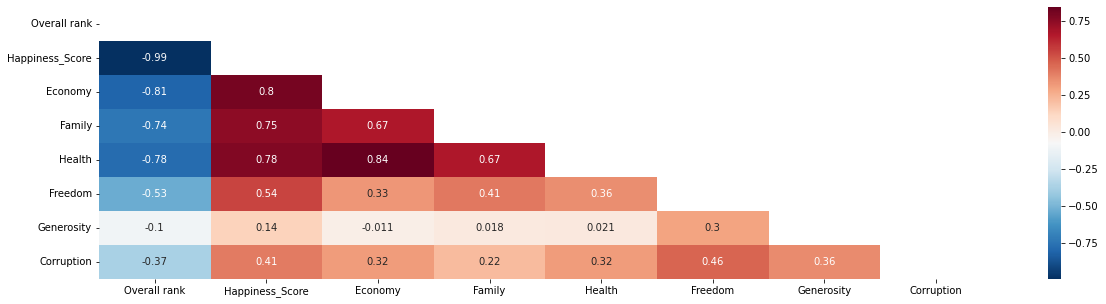

In [90]:
mask = np.zeros_like(happy_data_2018.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(20,5))
sns.heatmap(happy_data_2018.corr(),cmap='RdBu_r',mask=mask, annot=True)

<AxesSubplot:xlabel='Happiness_Score', ylabel='Country'>

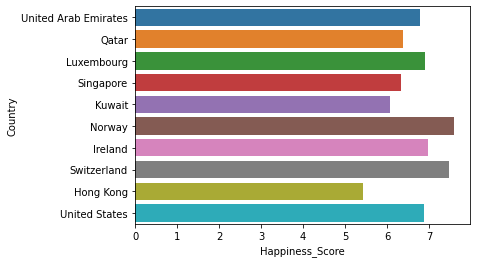

In [99]:
sns.barplot(x = 'Happiness_Score',y = 'Country',data=happy_data_2018.nlargest(10,'Economy'))

<AxesSubplot:xlabel='Corruption', ylabel='Country'>

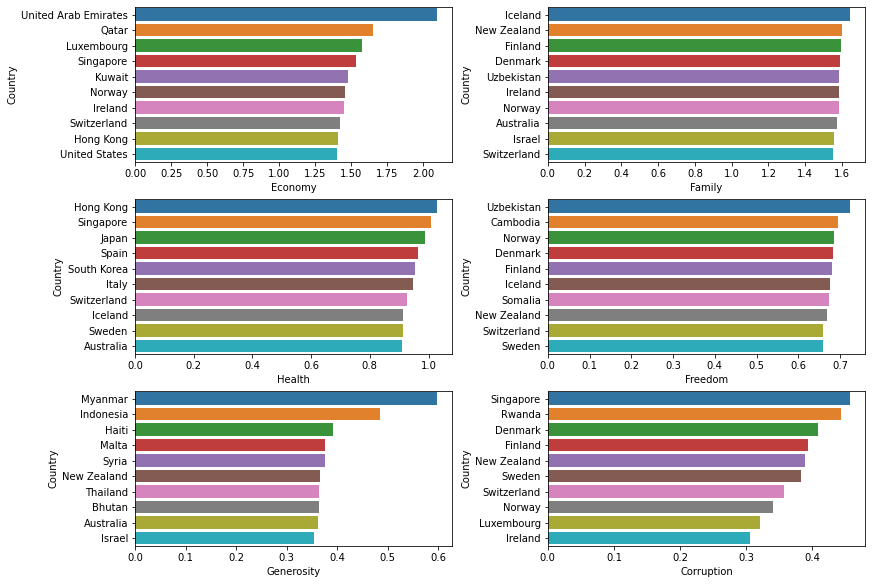

In [103]:
fig, axes = plt.subplots(nrows=3, ncols=2,constrained_layout=True,figsize=(12,8))

sns.barplot(x='Economy',y='Country',data=happy_data_2018.nlargest(10,'Economy'),
            ax=axes[0,0])
sns.barplot(x='Family' ,y='Country',data=happy_data_2018.nlargest(10,'Family'),
            ax=axes[0,1])
sns.barplot(x='Health' ,y='Country',data=happy_data_2018.nlargest(10,'Health'),
            ax=axes[1,0])
sns.barplot(x='Freedom' ,y='Country',data=happy_data_2018.nlargest(10,'Freedom'),
            ax=axes[1,1])
sns.barplot(x='Generosity' ,y='Country',data=happy_data_2018.nlargest(10,'Generosity'),
            ax=axes[2,0])
sns.barplot(x='Corruption' ,y='Country',data=happy_data_2018.nlargest(10,'Corruption'),
            ax=axes[2,1])

## 2019 Dataset analysis

In [91]:
happy_data_2019 = pd.read_csv(r"C:\Users\mansi\Advance Big data\Assignment 3\Happiness\2019.csv")
happy_data_2019.head()

,Overall rank,Country,Happiness_Score,Economy,Family,Health,Freedom,Generosity,Corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [92]:
happy_data_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Overall rank     156 non-null    int64  
 1   Country          156 non-null    object 
 2   Happiness_Score  156 non-null    float64
 3   Economy          156 non-null    float64
 4   Family           156 non-null    float64
 5   Health           156 non-null    float64
 6   Freedom          156 non-null    float64
 7   Generosity       156 non-null    float64
 8   Corruption       156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [93]:
happy_data_2019.describe()

,Overall rank,Happiness_Score,Economy,Family,Health,Freedom,Generosity,Corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [94]:
happy_data_2019.shape

(156, 9)

<AxesSubplot:>

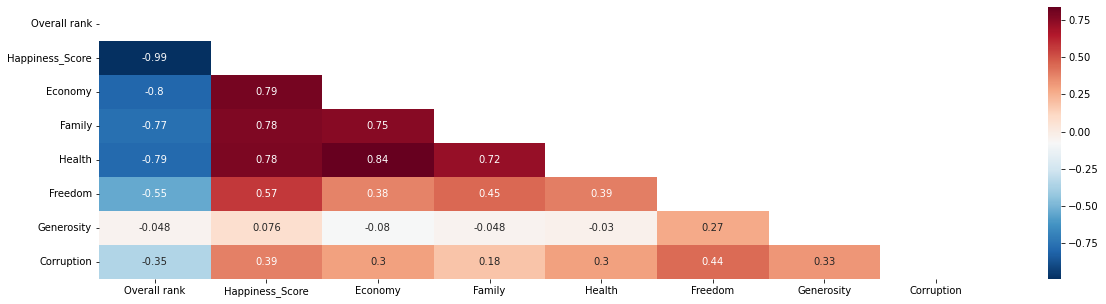

In [95]:
mask = np.zeros_like(happy_data_2019.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(20,5))
sns.heatmap(happy_data_2019.corr(),cmap='RdBu_r',mask=mask, annot=True)

<AxesSubplot:xlabel='Happiness_Score', ylabel='Country'>

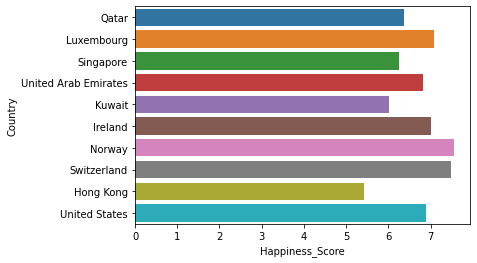

In [98]:
sns.barplot(x = 'Happiness_Score',y = 'Country',data=happy_data_2019.nlargest(10,'Economy'))

<AxesSubplot:xlabel='Corruption', ylabel='Country'>

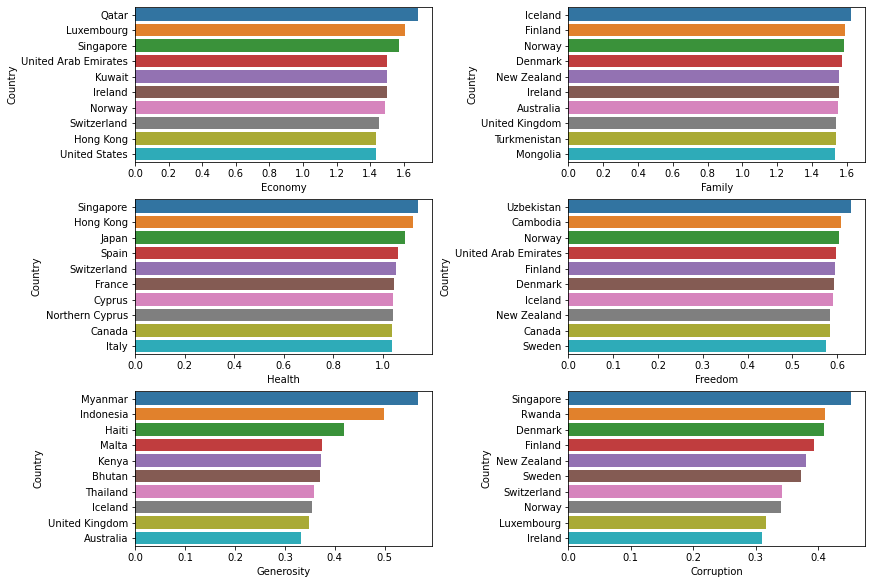

In [104]:
fig, axes = plt.subplots(nrows=3, ncols=2,constrained_layout=True,figsize=(12,8))

sns.barplot(x='Economy',y='Country',data=happy_data_2019.nlargest(10,'Economy'),
            ax=axes[0,0])
sns.barplot(x='Family' ,y='Country',data=happy_data_2019.nlargest(10,'Family'),
            ax=axes[0,1])
sns.barplot(x='Health' ,y='Country',data=happy_data_2019.nlargest(10,'Health'),
            ax=axes[1,0])
sns.barplot(x='Freedom' ,y='Country',data=happy_data_2019.nlargest(10,'Freedom'),
            ax=axes[1,1])
sns.barplot(x='Generosity' ,y='Country',data=happy_data_2019.nlargest(10,'Generosity'),
            ax=axes[2,0])
sns.barplot(x='Corruption' ,y='Country',data=happy_data_2019.nlargest(10,'Corruption'),
            ax=axes[2,1])

### Combine visulations 

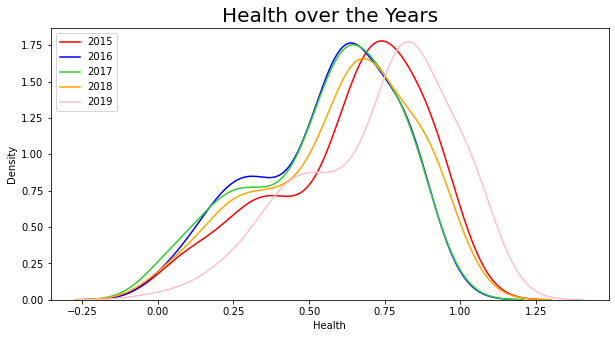

In [184]:
f,ax = plt.subplots(figsize=(10,5))
sns.kdeplot(happy_data_2015['Health'],color='red', label = '2015')
sns.kdeplot(happy_data_2016['Health'],color='blue',label = '2016')
sns.kdeplot(happy_data_2017['Health'],color='limegreen',label = '2017')
sns.kdeplot(happy_data_2018['Health'],color='orange',label = '2018')
sns.kdeplot(happy_data_2019['Health'],color='pink',label = '2019')
ax.legend(loc="upper left",frameon = True)
plt.title('Health over the Years',size=20)
plt.show()

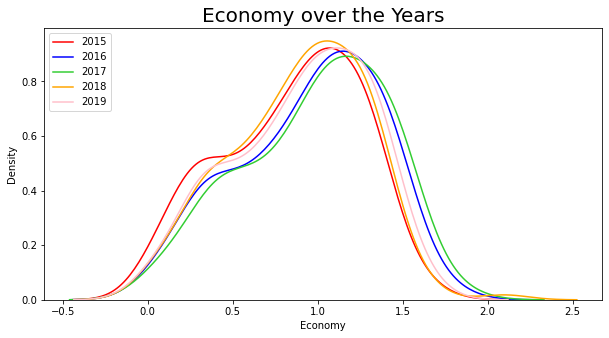

In [185]:
f,ax = plt.subplots(figsize=(10,5))
sns.kdeplot(happy_data_2015['Economy'],color='red',label = '2015')
sns.kdeplot(happy_data_2016['Economy'],color='blue',label = '2016')
sns.kdeplot(happy_data_2017['Economy'],color='limegreen',label = '2017')
sns.kdeplot(happy_data_2018['Economy'],color='orange',label = '2018')
sns.kdeplot(happy_data_2019['Economy'],color='pink',label = '2019')
ax.legend(loc="upper left",frameon = True)
plt.title('Economy over the Years',size=20)
plt.show()

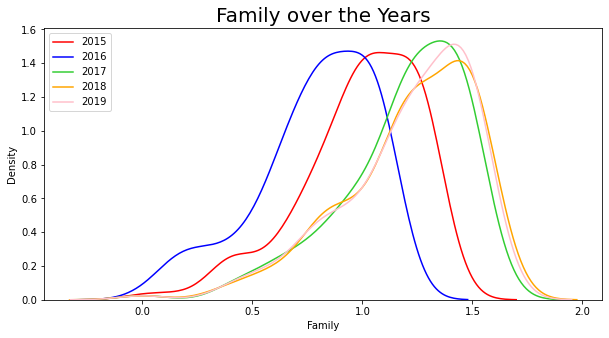

In [186]:
f,ax = plt.subplots(figsize=(10,5))
sns.kdeplot(happy_data_2015['Family'],color='red',label = '2015')
sns.kdeplot(happy_data_2016['Family'],color='blue',label = '2016')
sns.kdeplot(happy_data_2017['Family'],color='limegreen',label = '2017')
sns.kdeplot(happy_data_2018['Family'],color='orange',label = '2018')
sns.kdeplot(happy_data_2019['Family'],color='pink',label = '2019')
ax.legend(loc="upper left",frameon = True)
plt.title('Family over the Years',size=20)
plt.show()

In [110]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
happy_data_2015['Region']= label_encoder.fit_transform(happy_data_2015['Region'])
happy_data_2015['Region'].unique()

array([9, 5, 0, 4, 3, 6, 1, 2, 8, 7], dtype=int64)

In [111]:
happy_data_2015['Country']= label_encoder.fit_transform(happy_data_2015['Country'])
happy_data_2015['Country'].unique()

array([135,  58,  37, 105,  24,  45,  99, 134, 100,   6,  64,  33,   7,
        91, 150,  18,  82,  63,  12, 148, 149, 106, 153, 123, 109,  49,
        27, 115,  46,   4,  36, 151,  29, 140, 119, 129,  88, 137,  73,
       132, 142,  42,  52, 152, 124,  68, 128,  40,   9,  65,  15,  92,
       110,  70, 125,  81, 101, 111,  11, 113,  86,  34,  80, 117,  67,
       104,  35,   2,  72, 145,  90,  56,  43,  60, 154, 144,  74, 103,
        14,   8, 107,  69,  94,  28, 156, 116, 121, 114,  76, 112, 126,
        95,  83,  96,   1,  16,  78,  39,  75,  93, 133,  51,  77,  57,
        55, 138, 143, 108,  10,  61, 147,  62, 127,  50, 157,  79,  59,
       131,  54,  32,  98,  44, 122,  89,  71,  38,   5,  17,  97,  48,
        85, 130,  23,  19,  41, 155,   3,  87,  31,  30, 146, 120,  47,
       102,  22, 139,  84,  25,  26,  53,  66,  20,   0, 118,  13, 136,
        21, 141], dtype=int64)

In [112]:
predictors = ['Region','Country','Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia_Residual']
outcome = 'Happiness_Score'

# Partition data into both train and test data
#
X = happy_data_2015[predictors]
y = happy_data_2015[outcome]
#train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=9)

# Build the linear regression model
#
health_lm = LinearRegression()
health_lm.fit(X, y)

# Regression coefficients
#
print('intercept ', health_lm.intercept_)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': health_lm.coef_}))

# Accuracy Metrics for the Regression Model
#
# Performance measures
#RSME as low as possible is good.
regressionSummary(y, health_lm.predict(X))

intercept  0.0002039215090183788
           Predictor   coefficient
0             Region -1.463900e-05
1            Country -8.879844e-07
2            Economy  1.000106e+00
3             Family  9.999946e-01
4             Health  9.997853e-01
5            Freedom  9.997114e-01
6              Trust  9.999973e-01
7         Generosity  1.000181e+00
8  Dystopia_Residual  1.000026e+00

Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 0.0003
            Mean Absolute Error (MAE) : 0.0002
          Mean Percentage Error (MPE) : 0.0000
Mean Absolute Percentage Error (MAPE) : 0.0046


In [66]:
print('\nRidge')
ridge = Ridge(normalize=True, alpha=1)
ridge.fit(X, y)
regressionSummary(y, ridge.predict(X))

print('\n\nRidge coefficients', ridge.coef_)


Ridge

Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 0.3732
            Mean Absolute Error (MAE) : 0.3054
          Mean Percentage Error (MPE) : -1.5217
Mean Absolute Percentage Error (MAPE) : 6.0826


Ridge coefficients [-1.00339934e-02  2.19237315e-04  5.89986336e-01  8.14176629e-01
  8.39083223e-01  1.00100745e+00  8.53211470e-01  4.64835022e-01
  5.05331946e-01]


In [125]:
happy_to_predict_2016 = happy_data_2016[['Region','Country','Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia_Residual']]
happy_to_predict_2016.shape

(158, 9)

In [69]:
happy_to_predict_2016['Region']= label_encoder.fit_transform(happy_to_predict_2016['Region'])
happy_to_predict_2016['Region'].unique()

array([9, 5, 0, 4, 3, 6, 1, 2, 8, 7])

In [71]:
happy_to_predict_2016['Country']= label_encoder.fit_transform(happy_to_predict_2016['Country'])
happy_to_predict_2016['Country'].unique()

array([ 37, 134,  57, 103,  44,  25,  97,  98,   6, 133,  63,   7, 149,
        33, 112,  48,  19,  12,  62,  80,  89, 121, 148,  27, 106,   4,
        36, 147, 150,  86,  29,  45, 139, 117, 136, 113, 129,   2,  51,
       132,  72,   9, 141, 152, 122,  41,  84,  99, 151,  64,  39,  13,
        67,  69,  90, 115, 110, 127,  16,  79,  11, 102, 123, 108, 144,
        88,  78,  75,  35, 107, 114,  42,  66,  34,  55, 124,  71, 143,
        59,  68,   8, 109,  28,  15,  73, 119,  17,  92,  38,  93,  56,
       104,  76, 111,  81, 153, 125, 142,  50, 137,  91,  74, 101,  54,
        60, 155,  96, 105,   1,  10, 120,  61,  95,  24,  43, 126, 130,
        58,  94,  40,   5,  70, 146,  49,  32,  47,  31, 118,  20,  87,
       156,  83, 131,  46,  85,  53,  18,  30,  65,  23,   3, 100, 128,
        26,  21, 145, 154,  82, 138,  77,  52, 116,  14,   0, 140, 135,
        22])

In [72]:
predict_2016 = ridge.predict(happy_to_predict_2016)
print(predict_2016)

[6.7473051  6.77925377 6.65459536 6.72535625 6.67364312 6.66122146
 6.56374215 6.74909935 6.67175889 6.62747039 6.40041049 6.41802054
 6.40985969 6.37223572 6.37822084 6.39288963 6.20104615 6.32186269
 6.37519112 6.38279736 6.06574922 6.33950023 6.24095797 6.08694179
 6.13622162 6.07378659 6.07590452 6.20382339 6.15873428 6.08867711
 5.93990403 6.04145415 5.95742044 5.93349523 5.92916843 6.15892353
 5.9611046  5.73435727 5.81756166 5.81911411 5.89104589 5.90689937
 5.79390913 5.67760122 5.73908603 5.6390227  5.63951942 5.70046333
 5.87785573 5.61280929 5.68625225 5.55500742 5.88269808 5.67270203
 5.45567604 5.62662043 5.7117822  5.58688109 5.52157463 5.54864225
 5.60690363 5.60831334 5.75019751 5.49213449 5.56738255 5.42896329
 5.45633831 5.44104286 5.33876218 5.50247465 5.3898025  5.56663693
 5.41504353 5.27176143 5.64948917 5.0696147  5.13096096 5.3122257
 5.17903842 5.27955659 5.26527999 5.28506193 5.29260891 5.19485735
 5.20609693 5.12350591 5.00446747 5.11531407 5.31598288 4.97943

In [139]:
regressionSummary(happy_data_2016['Happiness_Score'], predict_2016)


Regression statistics

                      Mean Error (ME) : 0.1041
       Root Mean Squared Error (RMSE) : 0.3920
            Mean Absolute Error (MAE) : 0.3205
          Mean Percentage Error (MPE) : 0.4440
Mean Absolute Percentage Error (MAPE) : 6.0694


### Predicting 2017 using 2016 data and checking accuracy

In [141]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
happy_data_2016['Country']= label_encoder.fit_transform(happy_data_2016['Country'])
happy_data_2016['Country'].unique()

array([ 37, 134,  57, 103,  44,  25,  97,  98,   6, 133,  63,   7, 149,
        33, 112,  48,  19,  12,  62,  80,  89, 121, 148,  27, 106,   4,
        36, 147, 150,  86,  29,  45, 139, 117, 136, 113, 129,   2,  51,
       132,  72,   9, 141, 152, 122,  41,  84,  99, 151,  64,  39,  13,
        67,  69,  90, 115, 110, 127,  16,  79,  11, 102, 123, 108, 144,
        88,  78,  75,  35, 107, 114,  42,  66,  34,  55, 124,  71, 143,
        59,  68,   8, 109,  28,  15,  73, 119,  17,  92,  38,  93,  56,
       104,  76, 111,  81, 153, 125, 142,  50, 137,  91,  74, 101,  54,
        60, 155,  96, 105,   1,  10, 120,  61,  95,  24,  43, 126, 130,
        58,  94,  40,   5,  70, 146,  49,  32,  47,  31, 118,  20,  87,
       156,  83, 131,  46,  85,  53,  18,  30,  65,  23,   3, 100, 128,
        26,  21, 145, 154,  82, 138,  77,  52, 116,  14,   0, 140, 135,
        22], dtype=int64)

In [136]:
predictors = ['Country','Economy', 'Family', 'Health', 'Freedom', 'Generosity', 'Dystopia_Residual']
outcome = 'Happiness_Score'

# Partition data into both train and test data
#
X_2016 = happy_data_2016[predictors]
y_2016 = happy_data_2016[outcome]
#train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=9)

# Build the linear regression model
#
health_lm_2016 = LinearRegression()
health_lm_2016.fit(X_2016, y_2016)

# Regression coefficients
#
print('intercept ', health_lm_2016.intercept_)
print(pd.DataFrame({'Predictor': X_2016.columns, 'coefficient': health_lm_2016.coef_}))

# Accuracy Metrics for the Regression Model
#
# Performance measures
#RSME as low as possible is good.
regressionSummary(y_2016, health_lm_2016.predict(X_2016))

intercept  -0.02877798615802174
           Predictor  coefficient
0            Country     0.000105
1            Economy     1.088221
2             Family     0.932374
3             Health     0.959526
4            Freedom     1.318327
5         Generosity     1.148719
6  Dystopia_Residual     0.998297

Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 0.0917
            Mean Absolute Error (MAE) : 0.0727
          Mean Percentage Error (MPE) : -0.0014
Mean Absolute Percentage Error (MAPE) : 1.3785


In [149]:
print('\nRidge')
ridge_2017 = Ridge(normalize=True, alpha=1)
ridge_2017.fit(X_2016, y_2016)
regressionSummary(y_2016, ridge_2017.predict(X_2016))

print('\n\nRidge coefficients', ridge_2017.coef_)


Ridge

Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 0.3833
            Mean Absolute Error (MAE) : 0.3201
          Mean Percentage Error (MPE) : -1.5754
Mean Absolute Percentage Error (MAPE) : 6.3687


Ridge coefficients [-2.89473850e-05  5.97653280e-01  8.18627535e-01  9.89175817e-01
  1.14772744e+00  4.78434448e-01  5.09195232e-01]


In [130]:
happy_to_predict_2017 = happy_data_2017[['Country','Economy', 'Family', 'Health', 'Freedom', 'Generosity', 'Dystopia_Residual']]
happy_to_predict_2017.shape

(155, 7)

In [133]:
happy_to_predict_2017['Country']= label_encoder.fit_transform(happy_to_predict_2017['Country'])
happy_to_predict_2017['Country'].unique()

array([104,  37,  57, 132,  44,  98,  25,  99, 131,   6,  63,  33,   7,
       147,  62,  48,  12,  80, 146,  28, 145,  19,  36,   4,  89, 121,
        86, 148,  51, 107,  45, 137, 134, 128, 113,  30, 117, 139,  72,
       122,   9,  84, 100,  39,  41, 111, 149,  64, 115,  13,  67,  79,
         2,  74, 126,  90, 114,  16, 142,  69, 103, 123, 109,  88,  35,
        42,  11,  78, 141, 108,  55, 110, 119,  68,  56,  66,  34,  71,
        29, 105,  59, 150,  92,  93,   8,  38,  50,  75, 112,  17,  54,
        81, 124, 151, 102, 135,  15,  73,  97,  91, 125, 140, 106,  40,
        20, 120,  24,  60,   1,  10,  96,  70,  94,  95, 118, 153,  61,
        46,  43, 129,   5,  58,  87,  31,  47,  32,  85,  65,  23, 130,
        49, 144, 143,  21, 101,  83,  27, 154,  76,   3,   0,  18,  14,
        82,  53, 152, 127,  77,  52, 138, 116, 133, 136,  22,  26])

In [138]:
predict_2017 = ridge_2017.predict(happy_to_predict_2017)
print(predict_2017)

[6.94991193 6.88671769 7.03775505 6.91356431 6.8683607  6.81462219
 6.82649203 6.7800825  6.75866155 6.80999859 6.70817251 6.69901211
 6.6636575  6.62735952 6.63984385 6.59800213 6.57418667 6.5942882
 6.44726664 6.35786466 6.3591139  6.31416541 6.4630586  6.40753394
 6.23788812 6.35280009 6.4567583  6.32732012 6.18238129 6.34520394
 6.32995109 6.33714637 6.27456591 6.38044363 6.17660528 6.2083217
 6.06845603 6.13169459 6.02598952 6.0801865  6.041913   5.9961351
 5.95707974 5.97008958 5.89734126 6.11411811 5.98775658 6.04047905
 5.96550831 5.83774575 6.13791979 5.9016571  5.69162979 5.87662957
 5.8820282  5.72823928 5.92198759 5.84606361 5.74143472 5.88751785
 5.93753094 6.09281113 5.81916914 5.81195098 5.81545309 5.85462929
 5.67677751 5.70525545 5.64379174 5.75142432 5.79892139 5.6490165
 5.52714405 5.55884372 5.54164713 5.66410843 5.45377237 5.39070347
 5.66558639 5.10403731 5.53441683 5.45277369 5.42183804 5.36369496
 5.42507917 5.6377071  5.46730368 5.4944162  5.75220234 5.39648302

In [140]:
regressionSummary(happy_data_2017['Happiness_Score'], predict_2017)


Regression statistics

                      Mean Error (ME) : -0.1618
       Root Mean Squared Error (RMSE) : 0.3942
            Mean Absolute Error (MAE) : 0.3331
          Mean Percentage Error (MPE) : -4.5942
Mean Absolute Percentage Error (MAPE) : 7.0829


### Predicting 2018 using 2017 data and checking accuracy

In [142]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
happy_data_2017['Country']= label_encoder.fit_transform(happy_data_2017['Country'])
happy_data_2017['Country'].unique()

array([104,  37,  57, 132,  44,  98,  25,  99, 131,   6,  63,  33,   7,
       147,  62,  48,  12,  80, 146,  28, 145,  19,  36,   4,  89, 121,
        86, 148,  51, 107,  45, 137, 134, 128, 113,  30, 117, 139,  72,
       122,   9,  84, 100,  39,  41, 111, 149,  64, 115,  13,  67,  79,
         2,  74, 126,  90, 114,  16, 142,  69, 103, 123, 109,  88,  35,
        42,  11,  78, 141, 108,  55, 110, 119,  68,  56,  66,  34,  71,
        29, 105,  59, 150,  92,  93,   8,  38,  50,  75, 112,  17,  54,
        81, 124, 151, 102, 135,  15,  73,  97,  91, 125, 140, 106,  40,
        20, 120,  24,  60,   1,  10,  96,  70,  94,  95, 118, 153,  61,
        46,  43, 129,   5,  58,  87,  31,  47,  32,  85,  65,  23, 130,
        49, 144, 143,  21, 101,  83,  27, 154,  76,   3,   0,  18,  14,
        82,  53, 152, 127,  77,  52, 138, 116, 133, 136,  22,  26])

In [156]:
predictors = ['Country','Economy', 'Family', 'Health', 'Freedom', 'Generosity','Corruption']
outcome = 'Happiness_Score'

# Partition data into both train and test data
#
X_2017 = happy_data_2017[predictors]
y_2017 = happy_data_2017[outcome]
#train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=9)

# Build the linear regression model
#
health_lm_2017 = LinearRegression()
health_lm_2017.fit(X_2017, y_2017)

# Regression coefficients
#
print('intercept ', health_lm_2017.intercept_)
print(pd.DataFrame({'Predictor': X_2017.columns, 'coefficient': health_lm_2017.coef_}))

# Accuracy Metrics for the Regression Model
#
# Performance measures
#RSME as low as possible is good.
regressionSummary(y_2017, health_lm_2017.predict(X_2017))

intercept  1.7955002988842201
    Predictor  coefficient
0     Country    -0.001254
1     Economy     0.771829
2      Family     1.163420
3      Health     1.271343
4     Freedom     1.465512
5  Generosity     0.430143
6  Corruption     0.858109

Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 0.4853
            Mean Absolute Error (MAE) : 0.3697
          Mean Percentage Error (MPE) : -0.8443
Mean Absolute Percentage Error (MAPE) : 7.2604


In [157]:
print('\nRidge')
ridge_2018 = Ridge(normalize=True, alpha=1)
ridge_2018.fit(X_2017, y_2017)
regressionSummary(y_2017, ridge_2018.predict(X_2017))

print('\n\nRidge coefficients', ridge_2018.coef_)


Ridge

Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 0.5535
            Mean Absolute Error (MAE) : 0.4523
          Mean Percentage Error (MPE) : -1.9175
Mean Absolute Percentage Error (MAPE) : 8.9650


Ridge coefficients [-3.87928252e-04  5.65724256e-01  7.95542787e-01  9.66698526e-01
  1.06718953e+00  2.85505111e-01  9.58522514e-01]


In [165]:
happy_to_predict_2018 = happy_data_2018[['Country','Economy', 'Family', 'Health', 'Freedom', 'Corruption', 'Generosity']]
happy_to_predict_2018.shape

(156, 7)

In [167]:
happy_to_predict_2018['Country']= label_encoder.fit_transform(happy_to_predict_2018['Country'])
happy_to_predict_2018['Country'].unique()

array([ 44, 105,  37,  57, 133,  99,  25, 100, 132,   6, 147,   7,  33,
        62,  48,  12,  81, 148,  63, 146,  36,  87,  45,  90,  28, 135,
       108,  19,   4,  51, 149, 114, 118, 122,  85, 129,  30, 140, 123,
        41, 101, 112,   9, 150,  72, 138,  64,  39,  13,  80, 124, 115,
        75,  67,  89,  66, 127, 104, 116,  69,  35,  16,  42, 109, 110,
        71,  91, 143,  56,  79, 111,  54,  11, 142, 106,  55, 113, 120,
        50,  76,  93,  34,  38,   2,  94,  29,   8, 136,  82,  68, 103,
        73,  17,  92, 152,  59,  15, 125,  24,  20,  98, 151,  46, 107,
       126,  60,  65,  49, 119,  74, 141,   1, 121,  31,  10, 130,  61,
        86,  97,  23,  21,  40,  95,  70, 154,  88,  43,  47,   5,  96,
        27,  32,  58, 102, 144,  14, 131, 145, 139,  52,  77,   3,  83,
       155,   0,  18,  84,  53,  78, 134, 117, 153, 137, 128,  26,  22])

In [169]:
predict_2018 = ridge_2018.predict(happy_to_predict_2018)
print(predict_2018)

[6.58844047 6.70039876 6.6948038  6.75259542 6.65507087 6.57161311
 6.63855036 6.69716884 6.60111999 6.73280759 6.13815629 6.4913764
 6.07269741 6.66143406 6.43465799 6.38253657 6.61278689 6.31935297
 6.51445956 5.59877615 6.06749227 6.56502713 6.18043474 5.61168961
 5.85839484 6.0270543  5.96307752 5.75553082 5.89895403 5.57823553
 6.02567087 6.36374272 5.80179906 6.72373604 5.68947028 6.17375226
 5.68606254 5.87596394 5.82786572 5.33805138 5.58631857 5.95651891
 6.1401228  6.07780471 5.99828859 6.09222271 5.96130597 5.71751064
 5.34252648 5.67649801 6.23381088 5.62969727 5.64340736 6.25620195
 5.94236482 5.73315456 5.71392648 5.96412338 5.58031875 5.82005631
 5.88621284 5.40322895 6.03933052 5.71244825 5.51766319 5.46398281
 5.10548834 5.60823944 5.52733036 5.54118788 5.48950775 5.31277216
 5.6435975  5.55712212 4.7010053  6.39680144 6.0002289  5.42764505
 5.31504327 5.7172529  5.39067009 5.5086238  5.76611119 5.03194138
 4.9452184  5.64672908 5.34485659 4.94491329 5.48878838 5.45409

In [171]:
regressionSummary(happy_data_2018['Happiness_Score'], predict_2018)


Regression statistics

                      Mean Error (ME) : -0.0545
       Root Mean Squared Error (RMSE) : 0.5769
            Mean Absolute Error (MAE) : 0.4664
          Mean Percentage Error (MPE) : -2.9956
Mean Absolute Percentage Error (MAPE) : 9.4147


### Predicting 2019 using 2018 data and checking accuracy

In [172]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
happy_data_2018['Country']= label_encoder.fit_transform(happy_data_2018['Country'])
happy_data_2018['Country'].unique()

array([ 44, 105,  37,  57, 133,  99,  25, 100, 132,   6, 147,   7,  33,
        62,  48,  12,  81, 148,  63, 146,  36,  87,  45,  90,  28, 135,
       108,  19,   4,  51, 149, 114, 118, 122,  85, 129,  30, 140, 123,
        41, 101, 112,   9, 150,  72, 138,  64,  39,  13,  80, 124, 115,
        75,  67,  89,  66, 127, 104, 116,  69,  35,  16,  42, 109, 110,
        71,  91, 143,  56,  79, 111,  54,  11, 142, 106,  55, 113, 120,
        50,  76,  93,  34,  38,   2,  94,  29,   8, 136,  82,  68, 103,
        73,  17,  92, 152,  59,  15, 125,  24,  20,  98, 151,  46, 107,
       126,  60,  65,  49, 119,  74, 141,   1, 121,  31,  10, 130,  61,
        86,  97,  23,  21,  40,  95,  70, 154,  88,  43,  47,   5,  96,
        27,  32,  58, 102, 144,  14, 131, 145, 139,  52,  77,   3,  83,
       155,   0,  18,  84,  53,  78, 134, 117, 153, 137, 128,  26,  22])

In [173]:
predictors = ['Country','Economy', 'Family', 'Health', 'Freedom', 'Generosity','Corruption']
outcome = 'Happiness_Score'

# Partition data into both train and test data
#
X_2018 = happy_data_2018[predictors]
y_2018 = happy_data_2018[outcome]
#train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=9)

# Build the linear regression model
#
health_lm_2018 = LinearRegression()
health_lm_2018.fit(X_2018, y_2018)

# Regression coefficients
#
print('intercept ', health_lm_2018.intercept_)
print(pd.DataFrame({'Predictor': X_2018.columns, 'coefficient': health_lm_2018.coef_}))

# Accuracy Metrics for the Regression Model
#
# Performance measures
#RSME as low as possible is good.
regressionSummary(y_2018, health_lm_2018.predict(X_2018))

intercept  1.9386180802893902
    Predictor  coefficient
0     Country    -0.001123
1     Economy     1.117375
2      Family     1.034859
3      Health     0.777304
4     Freedom     1.368320
5  Generosity     0.685155
6  Corruption     0.561701

Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 0.5106
            Mean Absolute Error (MAE) : 0.3994
          Mean Percentage Error (MPE) : -0.9577
Mean Absolute Percentage Error (MAPE) : 7.9466


In [174]:
print('\nRidge')
ridge_2019 = Ridge(normalize=True, alpha=1)
ridge_2019.fit(X_2018, y_2018)
regressionSummary(y_2018, ridge_2019.predict(X_2018))

print('\n\nRidge coefficients', ridge_2019.coef_)


Ridge

Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 0.5766
            Mean Absolute Error (MAE) : 0.4702
          Mean Percentage Error (MPE) : -1.9794
Mean Absolute Percentage Error (MAPE) : 9.3396


Ridge coefficients [-3.35522677e-04  6.28367955e-01  7.34410239e-01  8.69596661e-01
  9.56102492e-01  3.65529945e-01  8.56986868e-01]


In [175]:
happy_to_predict_2019 = happy_data_2019[['Country','Economy', 'Family', 'Health', 'Freedom', 'Corruption', 'Generosity']]
happy_to_predict_2019.shape

(156, 7)

In [176]:
happy_to_predict_2019['Country']= label_encoder.fit_transform(happy_to_predict_2019['Country'])
happy_to_predict_2019['Country'].unique()

array([ 43,  36, 105,  57,  98, 133, 132,  99,  23,   6,   5,  32,  63,
        81, 147,  62,  48,  11, 148,  35, 146,  86,  89,  44, 135,  26,
        51, 118, 114, 129, 108,  17, 149, 122,  40,  64,   8, 123, 140,
       112, 150,  80,  28, 124, 100,  71,   3, 115,  34,  38,  72, 138,
        75, 127,  41,  66,  88,  67,  54,  69,  14,  56, 109, 104, 110,
       113, 106, 116, 111, 120,  90,  79,  92, 136,  33,  55,  37,  15,
       142,  84,  10,  50,  91, 103, 102,  73, 143,   2,  93,   7,  76,
        59,  27, 152,  13,  22,  18,  49,  65,  97,  68,  12,  30,  45,
        74, 126,   1, 151,  21, 107, 119, 125,  96, 101,  19,   4,  60,
        52,  47,  46,  70,  87,  94, 141,   9,  61,  31,  85, 121, 130,
        95,  25, 145,  42, 131, 144,  39, 154, 139,  58,  78,  29,  82,
        77,  20, 155,  53,  16, 134,  83, 153, 117, 137,   0,  24, 128])

In [178]:
predict_2019 = ridge_2019.predict(happy_to_predict_2019)
print(predict_2019)

[6.53033889 6.6453529  6.72419556 6.67968645 6.58345928 6.63615902
 6.54592202 6.63746923 6.60920452 6.46496018 6.65649743 6.06082067
 6.1876151  6.5699767  6.44924136 6.62764519 6.40179085 6.31167978
 6.23688442 6.00248451 6.27296429 6.52407353 5.70214537 6.22106737
 6.0729816  5.88225883 5.59147989 5.90168311 6.35705149 6.11949278
 5.97782254 5.70378025 6.00593536 6.77814673 5.4368382  5.99039016
 6.22166836 5.87570851 5.8984319  5.96059266 6.00032429 5.74068042
 5.75824753 6.21481022 5.57067874 5.62381657 5.86333587 5.66367863
 5.98772885 5.72981095 6.05343518 6.0539491  5.67802365 5.72871883
 6.10134437 5.71375769 5.91536303 6.17059806 5.57233777 5.84277674
 5.44933554 5.59362865 5.77319161 6.0411434  5.5958384  6.01932063
 4.86459312 5.63828469 5.49886433 5.58543999 5.24273608 5.574176
 5.56099699 5.15178693 5.66750949 6.38057611 5.77585727 5.47917633
 5.52867578 5.87157577 5.62149486 5.35473121 5.62314246 5.59821427
 4.87385291 5.59295382 5.74516792 5.18517078 5.01994777 5.431453

In [179]:
regressionSummary(happy_data_2018['Happiness_Score'], predict_2019)


Regression statistics

                      Mean Error (ME) : -0.0947
       Root Mean Squared Error (RMSE) : 0.5953
            Mean Absolute Error (MAE) : 0.4842
          Mean Percentage Error (MPE) : -3.8981
Mean Absolute Percentage Error (MAPE) : 9.9141


### Conclusion 
#### Analysis based on graph
* In all the years switzerland has the highest happiness score, though switzerland is mostly not in the top ten for the predictors.
* This conlude that happiness score is related to some other factors apart from what is mention here or data may be recorded wrong.

#### Analysis based on prediction model
* The model of predicting 2016 dataset using 2015 data has the minimum RSME error so compared to the other model it is the good one.